# Study of the Phase transition in the 2nn Ising Model by using DMRG

#### Imports

In [2]:
import matplotlib.pyplot as plt
import numpy as np

##### Data

In [56]:
hs=np.linspace(1,7.5,14)
hs=np.append(hs,5.43656365691809)
ls=[256]

z_l=[]

x={}
corr={}
for l in ls: 
    z={}
    
    for h in hs:
        print(l,h)
        data = np.load(f"data/check_the_2nn_phase_transition/051222/test_obc_{l}_l_{h}_h_100_n.npz")
        z[h] = data["density"]
        corr[(l,h)] = data["correlation"]
        x[(l,h)]=data['magnetization_x']
        
    z_l.append(z)


256 1.0
256 1.5
256 2.0
256 2.5
256 3.0
256 3.5
256 4.0
256 4.5
256 5.0
256 5.5
256 6.0
256 6.5
256 7.0
256 7.5
256 5.43656365691809


 #### Plots

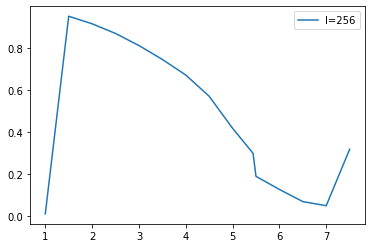

In [58]:
for l in ls:
    chi=[]
    for h in hs:
        chi.append(np.average((corr[(l,h)])))

    plt.plot(np.sort(hs),chi,label=f'l={l}')
plt.legend()
plt.show()

#### Critical behaviour

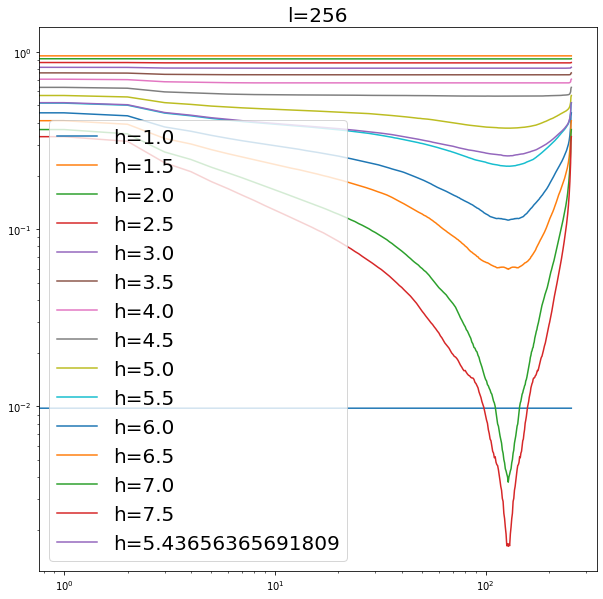

In [59]:
for i in range(len(ls)):
    plt.figure(figsize=(10,10))
    for h in hs:
        idx=np.arange(ls[i])
        xx=corr[(ls[i],h)]
        for r in range(ls[i]):
            m = xx[:, idx, (idx + r) % ls[i]]
            if r == 0:
                ms = m.reshape(-1, 1, ls[i])
            else:
                ms = np.append(ms, m.reshape(-1, 1, ls[i]), axis=-2)
        ms=np.average(ms,axis=0)
        ms=np.average(ms,axis=-1)
        plt.plot(idx,ms,label=f'h={h}')
    
    plt.legend(fontsize=20)
    plt.title(f'l={ls[i]}',fontsize=20)
    plt.loglog()
    plt.show()
                

## Study the Binder Cumulant

#### Imports

In [46]:
import matplotlib.pyplot as plt
import numpy as np
from src.utils_sparse_diag import binder_cumulant_computation

#### Data

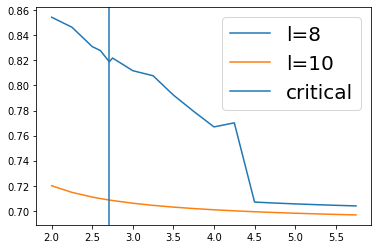

In [75]:
h_c=5.43656365691809
h_max=[h_c-0.5,h_c-0.25,h_c,h_c+0.25,h_c+0.5]
h_max=np.load('data/coordinates_hmax_binder_cumulator_constant_field_151222.npz')['hmax']
h_max=[2.0,2.25,2.5,2.6,2.71,2.75,3.0,3.25,3.5,3.75,4.0,4.25,4.5,4.75,5.0,5.25,5.5,5.75]
ls=[8,10]
u={}
for l in ls:
    for h in h_max:
        data=np.load(f'data/check_the_2nn_phase_transition/151222/binder_cumulant_obc_1nn_{l}_l_{h}_h_100_n.npz')
        m_4=data['m4']
        m_2=data['m2']
        m_4=np.average(m_4,axis=0)
        m_2=np.average(m_2,axis=0)
        #u[(l,h)]=(3-(m_4/((m_2)**2)))/2
        u[(l,h)]=(1-(m_4/((3*m_2)**2)))
        
        #u[(l,h)]=data['u']


for l in ls:
    plt.plot(h_max,[np.average(u[(l,h)]) for h in h_max],label=f'l={l}')
plt.axvline(x=2.71,label='critical')
plt.legend(fontsize=20)
plt.show()

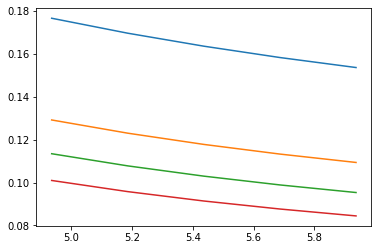

In [32]:
for l in ls:
    plt.plot(h_max,[np.average(u[(l,h)]) for h in h_max])
plt.show()
    